In [24]:
%run ../includes/common-20230414.ipynb

CPython 2024-01-15T08:21:20.744428


CPU times: user 568 µs, sys: 222 µs, total: 790 µs
Wall time: 805 µs


In [25]:
dfc_raw = get_df()
dfc_raw["Target Cache Size (TB)"] = dfc_raw["Target Cache Size"] / 1000

In [26]:
dfs_01 = get_data(dfc_raw, default_sample_ratio=.1)

9065


/tmp/ipykernel_7177/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)
/tmp/ipykernel_7177/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)


In [27]:
df_ = filter_df(
    dfc_raw,
    {
        "DWPDClose": True,
        "PracticalAP": True,
        "ShortLabel": [
            "CoinFlip",
            "RejectX",
            "Baleen (No Prefetch)",
            "Baleen (All on Partial Hit)",
            "Baleen (ML-Range on Partial Hit)",
            "Baleen (ML Prefetch)",
        ],
        "Target DWPD": [7.5],
        "ExperimentName": "20230419_alltraces_csizes",
        "SampleRatio": 0.1,
        "Target Cache Size": [100.,  200., 400.,  600.,  800., 1000., 1500., 2000.,
       2500., 3000.],
    },
)
df_['Target Cache Size'].value_counts()
    # 20230419_alltraces_csizes

400.0     85
200.0     82
100.0     80
600.0     74
800.0     74
1000.0    73
2000.0    71
1500.0    68
2500.0    65
3000.0    48
Name: Target Cache Size, dtype: int64

In [28]:
# 400.0     85
# 200.0     82
# 100.0     80
# 600.0     74
# 800.0     74
# 1000.0    73
# 2000.0    71
# 1500.0    68
# 2500.0    65
# 3000.0    48

In [29]:
df_['ShortLabel'].value_counts()

Baleen (ML-Range on Partial Hit)    152
Baleen (ML Prefetch)                148
Baleen (All on Partial Hit)         148
Baleen (No Prefetch)                146
CoinFlip                             74
RejectX                              52
Name: ShortLabel, dtype: int64

In [30]:

dfs = sampleright(df_, idx=['ShortLabel', 'AdmissionPolicyLabel', 'Prefetching', 'Target Cache Size', 'Target Cache Size (TB)'])
dff = fillright(dfs, idx=['ShortLabel', 'AdmissionPolicyLabel', 'Prefetching', 'Target Cache Size', 'Target Cache Size (TB)'])#, verbose=2)

In [31]:
dfs_star = add_pfbest(dff, y="P100ServiceTimeUtil@10m", columns=["Region", "Target Cache Size"], verbose=2)
# df_star = add_pfbest__(df_exp_for_star_, y="P100ServiceTimePercent@10m", columns=["Region", "Target DWPD"], verbose=2, skipna=True) #  "Target DWPD"

dff_all = pd.concat([dff, dfs_star])

P100ServiceTimeUtil@10m                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
Region                                                       Region1                                                                                                       Region2                                                                                                       Region3                                                                                                       Region4                                                                                                       Region5                                                                                                       Region6                                                                                                       Region7                                                                                                   
Target Cache Size                                             100.0      200.0      400.0      600.0      800.0      1000.0     1500.0     2000.0     2500.0     3000.0     100.0      200.0      400.0      600.0      800.0      1000.0     1500.0     2000.0     2500.0     3000.0     100.0      200.0      400.0      600.0      800.0      1000.0     1500.0     2000.0     2500.0     3000.0     100.0      200.0      400.0      600.0      800.0      1000.0     1500.0     2000.0     2500.0     3000.0     100.0      200.0      400.0      600.0      800.0      1000.0     1500.0     2000.0     2500.0     3000.0     100.0      200.0      400.0      600.0      800.0      1000.0     1500.0     2000.0     2500.0     3000.0     100.0      200.0      400.0      600.0      800.0      1000.0     1500.0     2000.0     2500.0     3000.0
AdmissionPolicyLabel Prefetching                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
Baleen               All on Partial Hit                   118.186583  26.935428  24.653663  24.545843  22.754187  22.283783  20.475530  18.944844  18.227580  18.227580  78.226409  11.232849  10.691774  10.152405   8.727289  10.841265  10.841265  10.841265  10.841265  10.841265  13.189022  13.717528  13.466621  13.466621  13.466621  13.466621  13.466621  13.466621  13.466621  13.466621  60.627979  59.102564  56.854466  34.991979  46.211627  32.222214  30.797858  30.758668  30.193870  35.811982  62.459709  36.779262  34.187117  32.885614  31.836037  31.364457  30.048055  28.366086  27.545509  26.190187  49.054843  41.672532  36.693311  34.268621  32.935870  32.122782  29.895288  27.845436  26.795735  25.701680  49.803095  41.

/tmp/ipykernel_7177/3317348687.py:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  best_pf_option_ = best_pf_option.idxmin(skipna=skipna)


P100ServiceTimeUtil@10m                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
Region                               Region1                                                                                                       Region2                                                                                                       Region3                                                                                               Region4                                                                                                       Region5                                                                                                       Region6                                                                                                       Region7                                                                                                   
Target Cache Size                      100.0      200.0      400.0      600.0      800.0     1000.0     1500.0     2000.0     2500.0     3000.0      100.0      200.0      400.0      600.0      800.0     1000.0     1500.0     2000.0     2500.0     3000.0      100.0      200.0     400.0     600.0     800.0    1000.0    1500.0    2000.0    2500.0    3000.0      100.0      200.0      400.0      600.0      800.0     1000.0     1500.0     2000.0     2500.0     3000.0      100.0      200.0      400.0      600.0      800.0     1000.0     1500.0     2000.0     2500.0     3000.0      100.0      200.0      400.0      600.0      800.0     1000.0     1500.0     2000.0     2500.0     3000.0      100.0      200.0      400.0      600.0      800.0     1000.0     1500.0     2000.0     2500.0     3000.0
AdmissionPolicyLabel                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
Baleen                             33.492214  26.649826  24.653663  24.371358  22.754187  22.283783  20.475530  18.944844  18.227580  18.227580  78.226409  11.232849  10.691774  10.152405   8.727289  10.282165  10.282165  10.282165  10.282165  10.282165   9.654575   8.300537  7.681624  7.681624  7.681624  7.681624  7.681624  7.681624  7.681624  7.681624  60.223736  58.241785  47.825223  34.991979  38.388395  32.222214  30.508005  29.874223  29.874223  34.751068  41.116135  36.779262  34.187117  32.885614  31.836037  31.364457  29.666300  28.366086  27.545509  26.078072  45.486742  41.672532  36.693311  34.268621  32.715294  32.122782  28.632819  27.805895  26.795735  25.489397  47.583247  40.915787  38.254279  36.390637  35.230365  35.170557  31.863696  30.481109  29.287625  28.790253
CoinFlip                           84.864

P100ServiceTimeUtil@10m                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      \
Region                               Region1                                                                                                                                                                                                           Region2                                                                                                                                                                                                                      Region3                                                                                                                                                                       Region4                                                                                                                                                                                                                            Region5                                                                                                       
Target Cache Size                      100.0                    200.0               400.0                    600.0               800.0              1000.0              1500.0              2000.0              2500.0              3000.0               100.0               200.0               400.0               600.0               800.0                   1000.0                   1500.0                   2000.0                   2500.0                   3000.0           100.0                200.0           400.0           600.0           800.0          1000.0          1500.0          2000.0          2500.0          3000.0                    100.0                200.0                    400.0               600.0                    800.0              1000.0                   1500.0                   2000.0                   2500.0                   3000.0           100.0               200.0               400.0               600.0               800.0              1000.0   
AdmissionPolicyLabel                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
Baleen                   ML-Range on ML-When  ML-Range on Partial Hit  All on Partial Hit  ML-Range o

In [32]:
x = 'Target Cache Size (TB)'
y = 'P100ServiceTimePercent@10m'


In [33]:
1.25/0.4

3.125

In [34]:
#dff[['ShortLabel', 'Target Cache Size (TB)', 'RegionLabel', y]].iloc[:10]
dff.groupby(['ShortLabel', 'Target Cache Size (TB)'])[y].mean().reset_index().pivot(index='ShortLabel', columns='Target Cache Size (TB)', values=y)


Target Cache Size (TB),0.1,0.2,0.4,0.6,0.8,1.0,1.5,2.0,2.5,3.0
ShortLabel,,,,,,,,,,
Baleen (All on Partial Hit),59.583122,38.509772,36.139405,34.061273,33.091303,31.689635,30.460735,29.195546,28.347512,27.901766
Baleen (ML Prefetch),41.982322,36.747165,34.152813,32.508783,30.856384,30.363829,28.427580,27.405411,26.867508,26.094599
Baleen (ML-Range on Partial Hit),45.659675,37.774075,33.880006,32.484255,30.638630,29.751611,29.559194,27.170499,26.531540,25.862851
Baleen (No Prefetch),50.846087,41.805991,39.398678,35.862046,32.475265,31.091792,28.470064,27.707211,26.779321,26.426612
CoinFlip,57.056357,48.945287,41.895420,38.028453,36.157930,34.940915,35.019953,33.379199,32.176313,30.428129
RejectX,46.992833,42.139330,37.386088,35.308337,34.216999,34.110788,32.828012,33.736808,30.989192,NaN


In [35]:
dff_all['ShortLabel'].value_counts()

Baleen (All on Partial Hit)         70
Baleen (ML Prefetch)                70
Baleen (ML-Range on Partial Hit)    70
Baleen (No Prefetch)                70
CoinFlip                            70
Baleen                              70
CoinFlip*                           70
RejectX                             63
RejectX*                            63
Name: ShortLabel, dtype: int64

In [36]:
hue = 'ShortLabel'

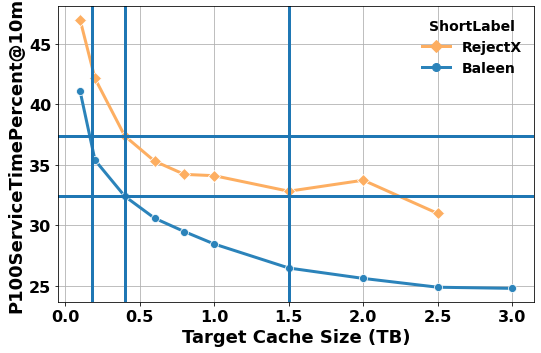

In [37]:
ax = plt.gca()
dff_ = filter_df(dff_all, {'ShortLabel': ['RejectX',  'Baleen']})
sns.lineplot(data=dff_, x=x, y=y, **get_kwargs(dff_, y, hue=hue), ax=ax, errorbar=None)
plt.axhline(32.413314)
plt.axhline(37.386088)
plt.axvline(1.5)
plt.axvline(0.4*0.45)
plt.axvline(0.4)

In [38]:
dfff = filter_df(dff_all, {'ShortLabel': ['RejectX', 'CoinFlip', 'Baleen (No Prefetch)', 'Baleen']})

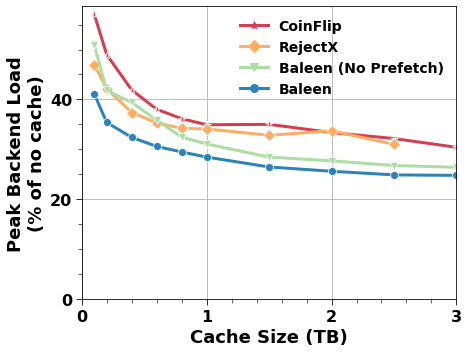

In [39]:
plt.figure(figsize=(6.4, 4.8))
ax = plt.gca()
#ax.set_title("Average")
sns.lineplot(data=dfff, x=x, y=y, **get_kwargs(dfff, y, hue=hue), ax=ax, errorbar=None)
# ax.axvline(.4, ls=':', c="black", label="400GB")
ax.set_xlabel('Cache Size (TB)')
postsubplot_csize(ax, 0)
ax.set_ylabel(nice_ylabel(y))
plt.legend(title=None)
plt.ylim(0, None)
plt.xlim(0, 3)
ax.set_xlabel('Cache Size (TB)')
savefig("summary", "peak-st-ratio_csize")

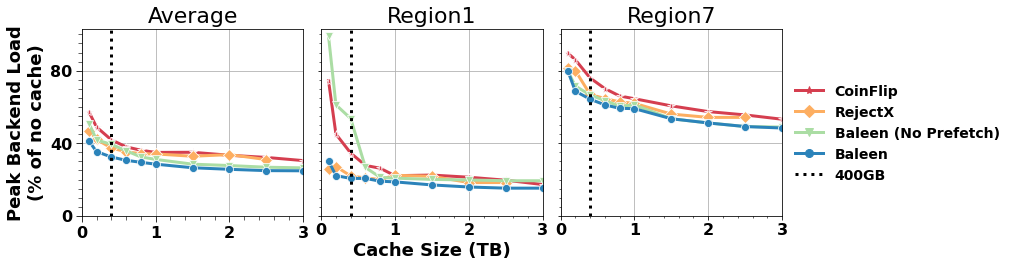

In [40]:
#df_ = df_1
x = 'Target Cache Size (TB)'
y = 'P100ServiceTimePercent@10m'
#y = 'P99ServiceTimePercent@10m'
#y = 'P100ServiceTimeUtil@10m'
hue = 'ShortLabel'
fig, ax = plt.subplots(
    nrows=1,
    ncols=3,
    sharex=True,
    sharey=True,
    figsize=(7 * 2.5*.8, 3 * 1.5*.8),
    layout="constrained",
)
ax = plt.subplot(1, 3, 1)
ax.set_title("Average")
sns.lineplot(data=dfff, x=x, y=y, **get_kwargs(dfff, y, hue=hue), ax=ax, errorbar=None)
ax.axvline(.4, ls=':', c="black", label="400GB")
ax.set_xlabel('Cache Size (TB)')
postsubplot_csize(ax, 0)
ax.set_ylabel(nice_ylabel(y))

ax.get_legend().remove()

ax = plt.subplot(1, 3, 2)
dfsel = filter_df(dfff, {'Region': 'Region1'})
ax.set_title(maps.region_labels['Region1'])
sns.lineplot(data=dfsel, x=x, y=y, **get_kwargs(dfsel, y, hue=hue), ax=ax, errorbar=None)
ax.axvline(.4, ls=':', c="black", label="400GB")
ax.set_xlabel('Cache Size (TB)')
ax.get_legend().remove()

ax = plt.subplot(1, 3, 3)
dfsel = filter_df(dfff, {'Region': 'Region7'})
ax.set_title(maps.region_labels['Region7'])
sns.lineplot(data=dfsel, x=x, y=y, **get_kwargs(dfsel, y, hue=hue), ax=ax, errorbar=None)
ax.axvline(.4, ls=':', c="black", label="400GB")
ax.set_xlabel('')
ax.get_legend().remove()

handles, labels = ax.get_legend_handles_labels()

plt.ylim(0, None)
plt.xlim(0, 3)
fig.legend(handles, labels, title=None, loc='outside center right')
savefig("csize", "avg-1-7_peak-st-ratio")

In [41]:
df_['Target Cache Size'].value_counts()

400.0     85
200.0     82
100.0     80
600.0     74
800.0     74
1000.0    73
2000.0    71
1500.0    68
2500.0    65
3000.0    48
Name: Target Cache Size, dtype: int64

In [42]:
# plot_csize_grid(df=dff, y=y, hue="ShortLabel", x="Target Cache Size (TB)")

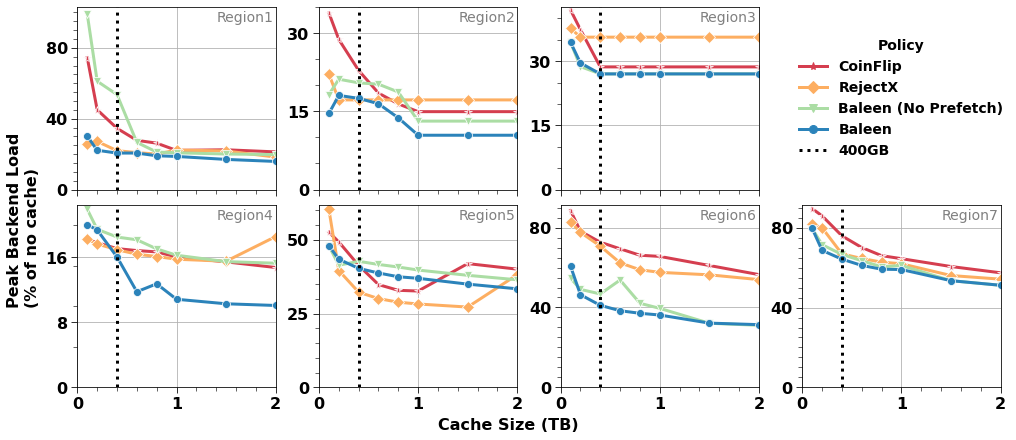

In [43]:
plot_csize_grid(df=dfff, y=y, hue="ShortLabel", x="Target Cache Size (TB)")

Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}
Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}
Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}
Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}
Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}
Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}
Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}


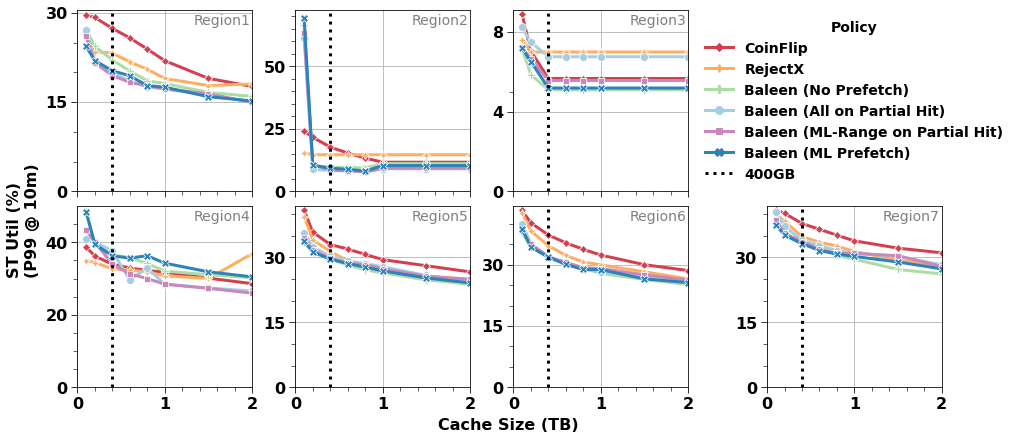

In [44]:
plot_csize_grid(df=dff, y="P99ServiceTimeUtil@10m", hue="ShortLabel", x="Target Cache Size (TB)")

Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}
Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}
Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}
Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}
Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}
Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}
Missing - not using SHORT_MARKERMAP
{'Baleen (ML-Range on Partial Hit)', 'Baleen (All on Partial Hit)'}


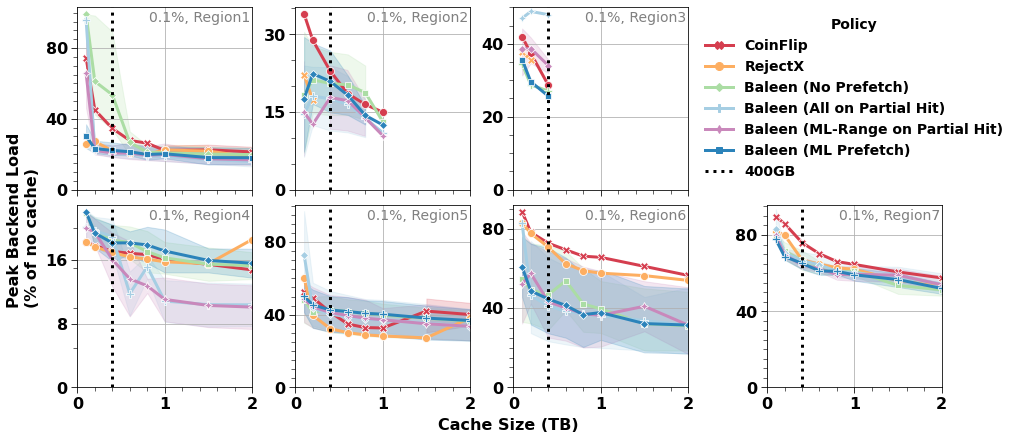

In [45]:
plot_csize_grid(df=df_, y=y, hue="ShortLabel", x="Target Cache Size (TB)")

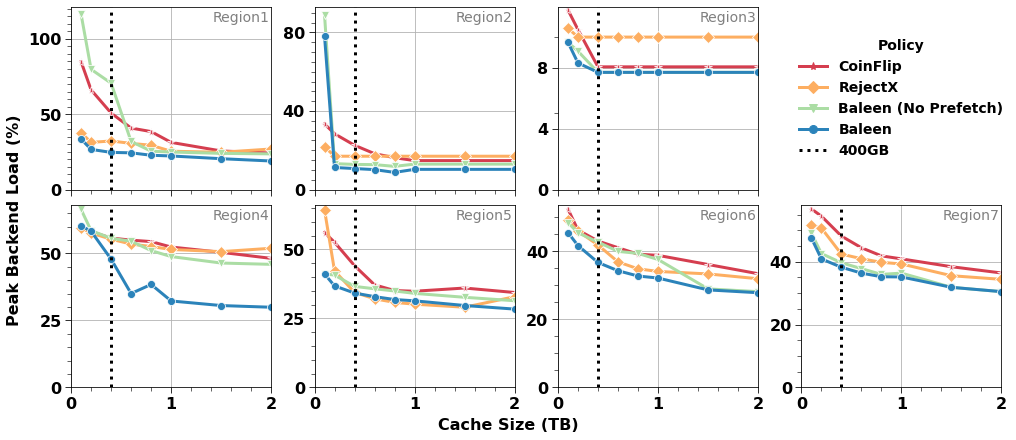

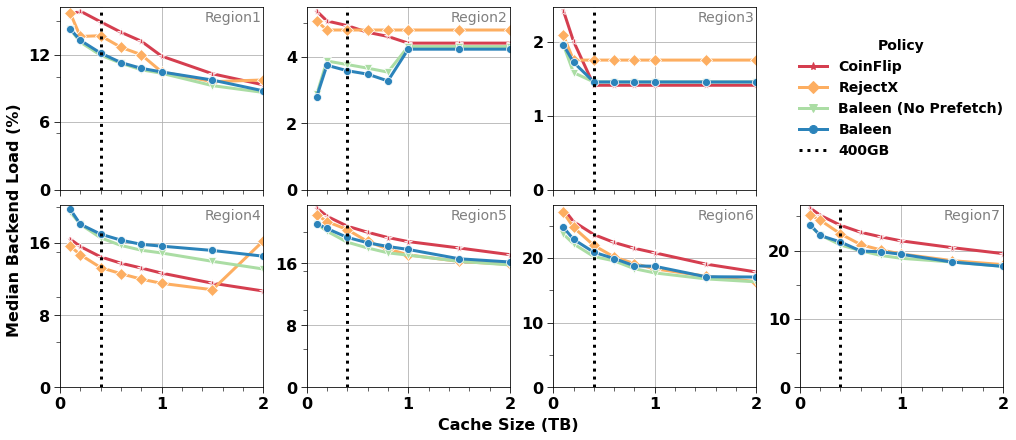

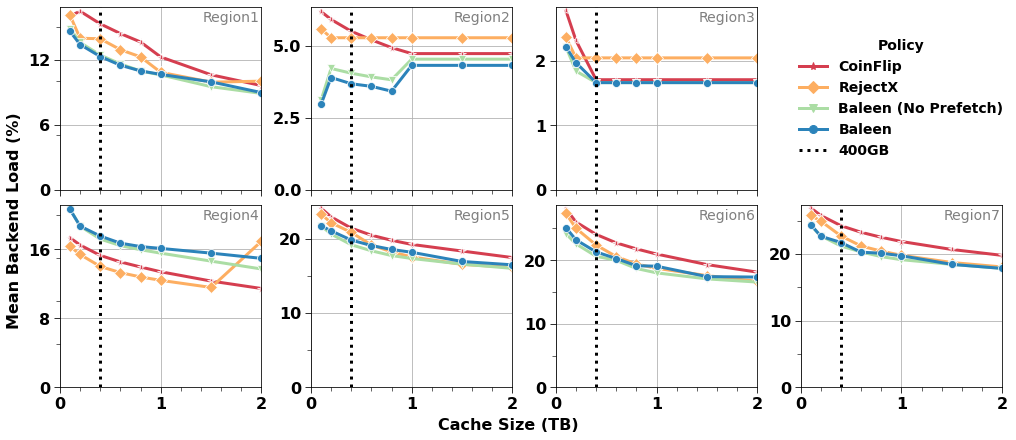

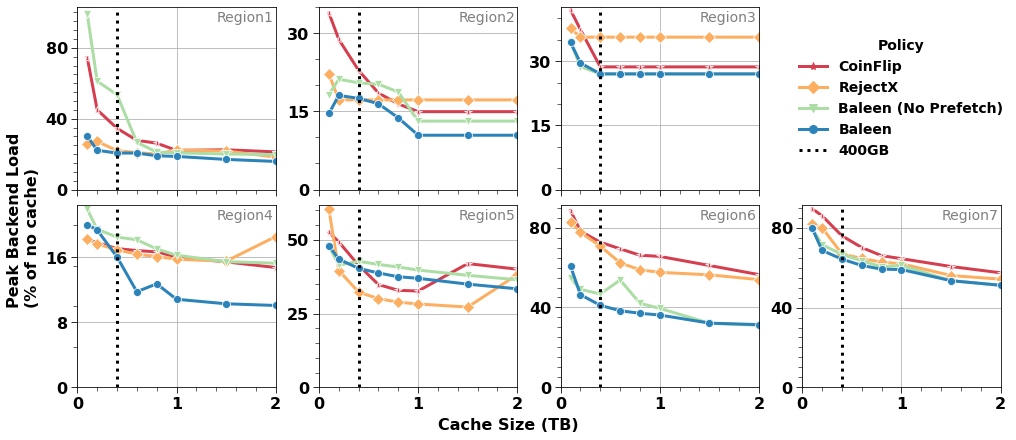

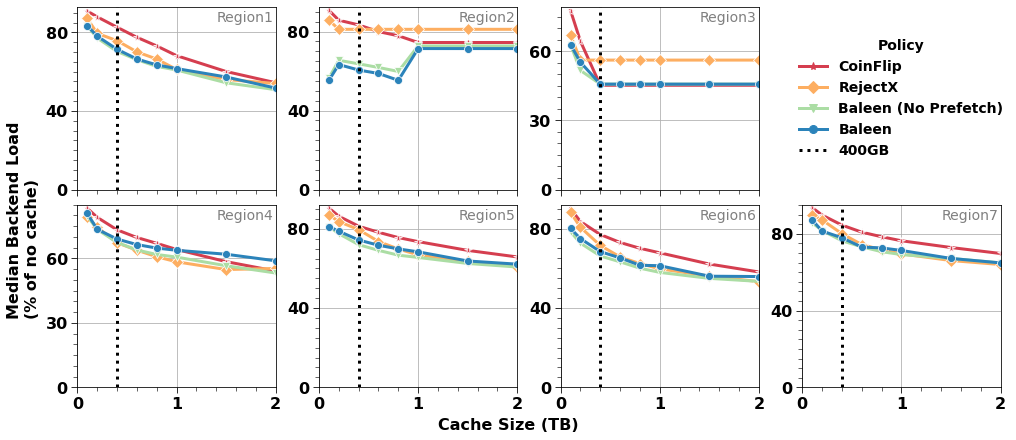

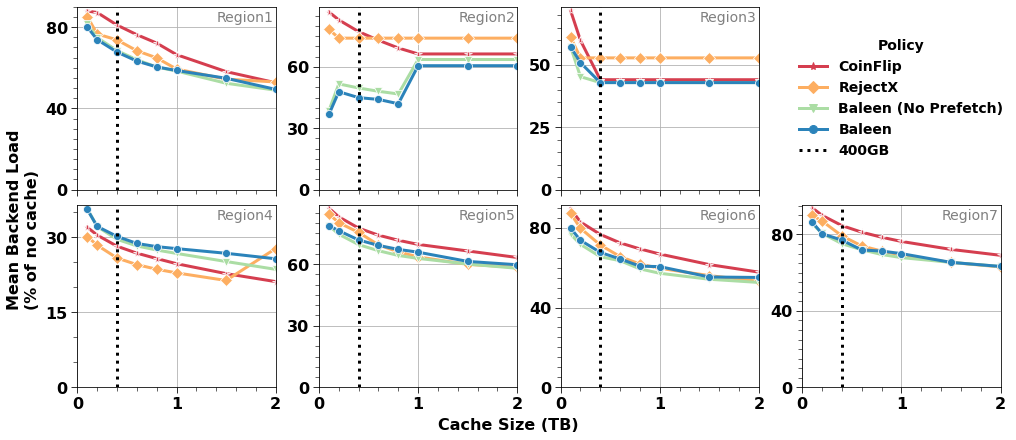

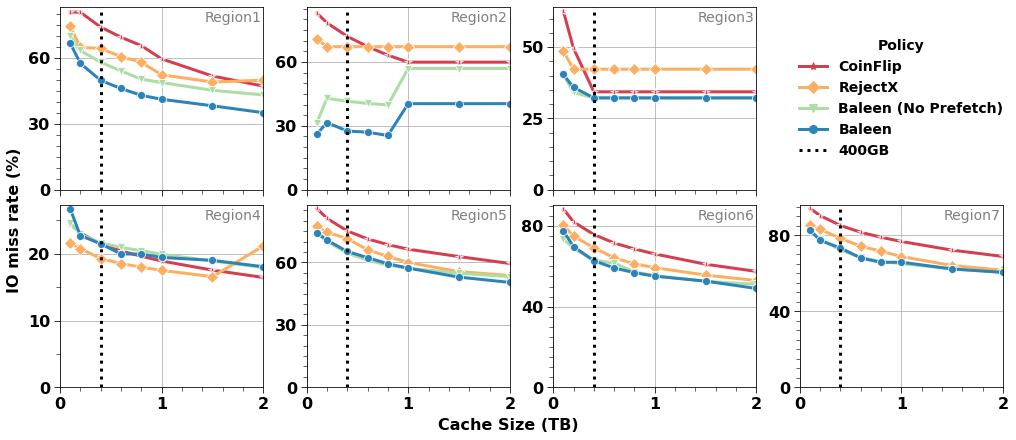

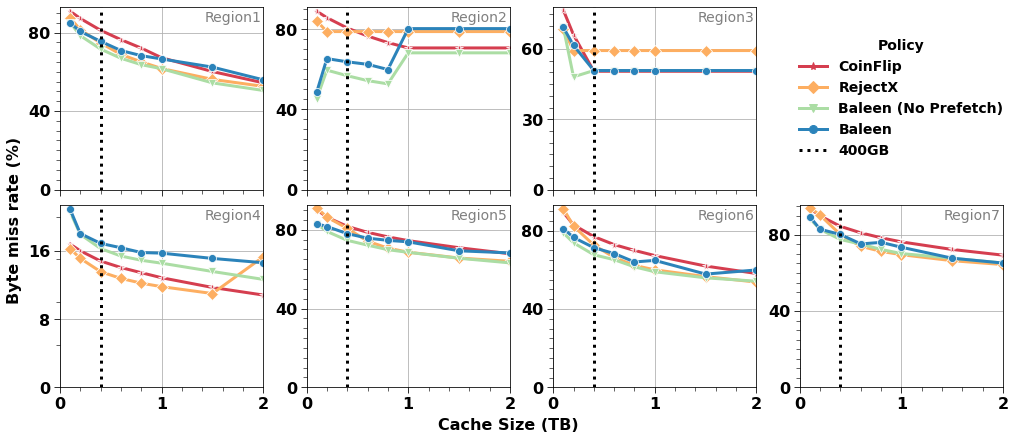

In [46]:
df_["Target Cache Size (TB)"] = df_["Target Cache Size"] / 1000
for k, v in figlabels.items():
    plot_csize_grid(df=dfff, y=v, hue="ShortLabel", x="Target Cache Size (TB)")
    savefig("csize", k)
    # break